In [1]:
import pandas as pd 
df=pd.read_csv('./data/nyse/prices-split-adjusted.csv')

pool=df['symbol'].unique()
df_c=df[df['symbol']==pool[0]][['date','close']].copy()
for key in pool[1:]:
    df_c=pd.merge(df_c, df[df['symbol']==key][['date','close']], on='date', how='outer')   

In [2]:
df_c.head()

,date,close_x,close_y,close_x,close_y,close_x,close_y,close_x,close_y,close_x,...,close_y,close_x,close_y,close_x,close_y,close_x,close_y,close_x,close_y,close
0,2016-01-05,125.839996,40.549999,40.520000,151.199997,102.709999,103.360001,42.919998,102.360001,92.339996,...,25.680000,11.34,47.529999,30.110001,45.490002,73.389999,34.310001,15.03,28.510000,NaN
1,2016-01-06,119.980003,40.730000,41.230000,147.199997,100.699997,101.779999,42.560001,102.160004,91.019997,...,25.280001,10.93,44.619999,29.900000,44.230000,73.529999,33.980000,14.80,28.059999,NaN
2,2016-01-07,114.949997,39.000000,40.450001,148.830002,96.449997,98.529999,41.540001,99.160004,89.110001,...,24.590000,10.27,45.639999,29.120001,43.790001,71.900002,33.130001,13.71,27.469999,NaN
3,2016-01-08,116.620003,38.590000,40.369999,145.559998,96.959999,97.959999,40.669998,98.199997,87.849998,...,23.820000,10.18,44.490002,28.840000,41.930000,71.180000,32.689999,13.54,27.690001,NaN
4,2016-01-11,114.970001,37.939999,41.080002,147.050003,98.529999,94.059998,40.730000,99.230003,89.379997,...,23.900000,10.00,44.220001,28.700001,39.759998,72.269997,33.040001,13.26,28.090000,NaN


In [3]:
df_c.columns=['date']+list(pool)
df_c.set_index('date',inplace=True)
df_c.index=pd.to_datetime(df_c.index)
df_c.sort_index(inplace=True)
df_c.head()

,WLTW,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,...,CFG,NAVI,QRVO,SYF,WRK,KHC,PYPL,HPE,CSRA,FTV
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,22.389128,4.77,40.380001,30.572857,26.629999,26.129884,42.070000,37.090000,31.670000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,22.145923,5.31,40.139999,30.625713,26.440001,25.918773,42.330002,37.700001,31.620001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,22.067240,5.09,40.490002,30.138571,26.190001,26.062713,42.779999,37.619999,31.559999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,22.038626,5.24,40.480000,30.082857,25.770000,26.278623,42.740002,36.889999,31.309999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,22.031474,5.14,40.639999,30.282858,26.049999,26.412967,42.570000,36.689999,31.490000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
rt=df_c/df_c.shift(1)-1
rt.fillna(0, inplace=True)
rt.head() 

,WLTW,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,...,CFG,NAVI,QRVO,SYF,WRK,KHC,PYPL,HPE,CSRA,FTV
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-05,0.0,-0.010863,0.113208,-0.005944,0.001729,-0.007135,-0.008079,0.006180,0.016447,-0.001579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-06,0.0,-0.003553,-0.041431,0.008720,-0.015906,-0.009455,0.005554,0.010631,-0.002122,-0.001898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-07,0.0,-0.001297,0.029470,-0.000247,-0.001849,-0.016037,0.008284,-0.000935,-0.019405,-0.007921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-08,0.0,-0.000325,-0.019084,0.003953,0.006648,0.010865,0.005112,-0.003978,-0.005422,0.005749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline


X=rt[rt.index>='2015-01-01']
X=X-X.mean()

In [6]:
A=np.dot(X.T.values,X.values) 
A.shape

(501, 501)

In [7]:
from numpy.linalg import eig

vals, vecs=eig(A)
Lambda = pd.DataFrame(np.diag(vals))
Lambda.iloc[:8]

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,25.840846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,5.875485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,4.843445,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,4.429131,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,2.969992,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.799259,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.408291,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.260503,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
eigvals=vals
eigvals[:7].sum()/eigvals.sum()

0.5209860468446025

In [9]:
beta1=np.real(vecs[:,0])
beta2=np.real(vecs[:,1])
beta3=np.real(vecs[:,2])
beta4=np.real(vecs[:,3])
beta5=np.real(vecs[:,4])
beta6=np.real(vecs[:,5])
beta7=np.real(vecs[:,6])

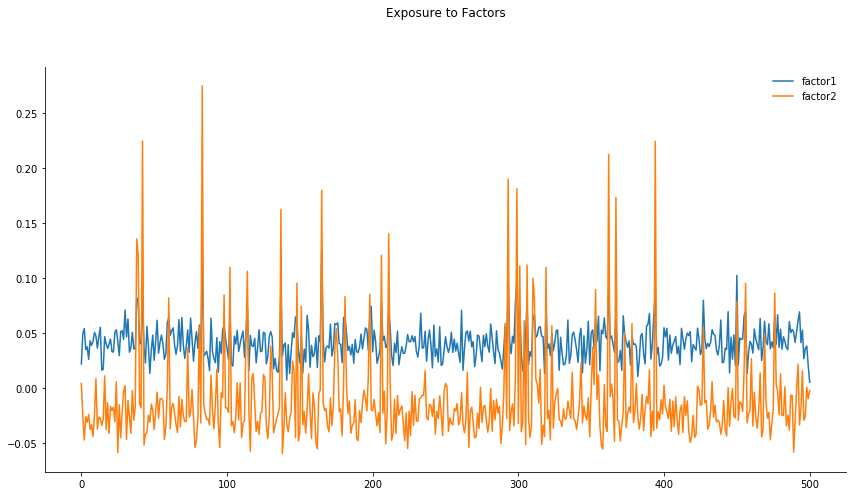

In [10]:
fig, ax=plt.subplots(figsize=(12,7))
 

plt.plot(beta1, label='factor1')  
plt.plot(beta2, label='factor2')
'''  
plt.plot(beta3, label='factor3')
plt.plot(beta4, label='factor4')
plt.plot(beta5, label='factor5')
plt.plot(beta6, label='factor6')
plt.plot(beta6, label='factor7')
'''    
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.title('Exposure to Factors\n\n\n')
plt.legend(frameon=False);
plt.tight_layout()
plt.savefig('exp1')
 


In [11]:
f1=np.dot(beta1.T, X.T.values)
f2=np.dot(beta2.T, X.T.values)
f3=np.dot(beta3.T, X.T.values)
f4=np.dot(beta4.T, X.T.values)
f5=np.dot(beta5.T, X.T.values)
f6=np.dot(beta6.T, X.T.values)
f7=np.dot(beta7.T, X.T.values)


In [12]:
f3.shape

(504,)

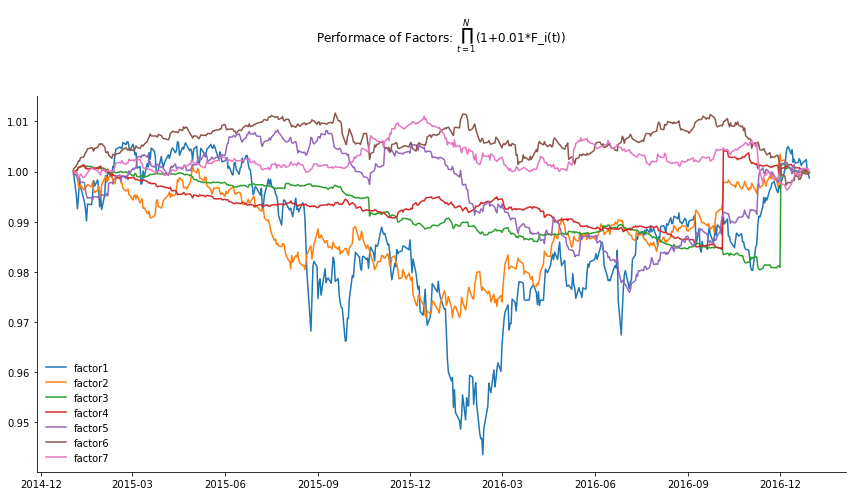

In [15]:
fig, ax=plt.subplots(figsize=(12,7))
plt.plot(rt.index[-len(X):], (1+0.01*f1).cumprod(),label='factor1')  
plt.plot(rt.index[-len(X):], (1+0.01*f2).cumprod(), label='factor2') 
plt.plot(rt.index[-len(X):], (1+0.01*f3).cumprod(),label='factor3')
plt.plot(rt.index[-len(X):], (1+0.01*f4).cumprod(), label='factor4')
plt.plot(rt.index[-len(X):], (1+0.01*f5).cumprod(),label='factor5')
plt.plot(rt.index[-len(X):], (1+0.01*f6).cumprod(), label='factor6')
plt.plot(rt.index[-len(X):], (1+0.01*f7).cumprod(),label='factor7') 
 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.title('Performace of Factors: $\prod_{t=1}^N$(1+0.01*F_i(t))\n\n\n')
plt.legend(loc='best',frameon=False);
plt.tight_layout()
plt.savefig('f')
 

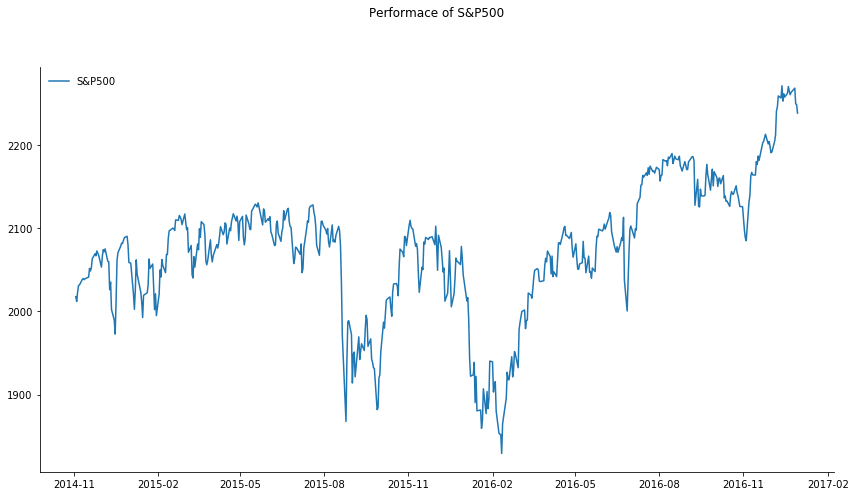

In [17]:
sp500=pd.read_csv('./data/SP500.csv')
sp500['Date']=pd.to_datetime(sp500['Date'])
sp500=sp500[(sp500['Date']>='2014-11-01') & (sp500['Date']<='2016-12-30')]
sp500.set_index('Date', inplace=True)
fig, ax=plt.subplots(figsize=(12,7))
plt.plot(sp500.index, sp500['Close'],label='S&P500')
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
plt.title('Performace of S&P500\n\n\n')
plt.legend(frameon=False); 
plt.tight_layout()
plt.savefig('sp500')
 